In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import plotly.express as px


In [2]:
data = pd.read_excel('data.xlsx')
data.head()


,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [3]:
data.columns

Index(['month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [4]:
data.dtypes

month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [5]:
fig = px.imshow(data.corr(numeric_only=True))
fig.show()

In [6]:
data['Classes'] = data['Classes'].str.strip()

In [7]:
X, y = data[['DMC', 'ISI']].values, data['Classes']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)
print(data[['DMC', 'ISI', 'Classes']].head())
print()
print(X_train.shape, y_train.shape)
print()
print(X_test.shape, y_test.shape)

   DMC  ISI   Classes
0  3.4  1.3  not fire
1  4.1  1.0  not fire
2  2.5  0.3  not fire
3  1.3  0.0  not fire
4  3.0  1.2  not fire

(146, 2) (146,)

(98, 2) (98,)


In [16]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(y_pred)

Number of mislabeled points out of a total 98 points : 5
['fire' 'not fire' 'fire' 'not fire' 'fire' 'not fire' 'fire' 'fire'
 'not fire' 'not fire' 'fire' 'fire' 'not fire' 'not fire' 'fire'
 'not fire' 'fire' 'not fire' 'fire' 'not fire' 'not fire' 'fire'
 'not fire' 'not fire' 'fire' 'not fire' 'not fire' 'fire' 'not fire'
 'fire' 'fire' 'not fire' 'not fire' 'not fire' 'fire' 'not fire'
 'not fire' 'not fire' 'not fire' 'fire' 'not fire' 'not fire' 'not fire'
 'fire' 'not fire' 'fire' 'fire' 'fire' 'fire' 'not fire' 'fire' 'fire'
 'fire' 'fire' 'fire' 'fire' 'fire' 'fire' 'not fire' 'fire' 'not fire'
 'fire' 'fire' 'fire' 'fire' 'fire' 'not fire' 'fire' 'fire' 'fire'
 'not fire' 'fire' 'not fire' 'not fire' 'fire' 'not fire' 'fire'
 'not fire' 'fire' 'not fire' 'not fire' 'not fire' 'fire' 'fire' 'fire'
 'not fire' 'fire' 'not fire' 'not fire' 'fire' 'fire' 'not fire'
 'not fire' 'not fire' 'not fire' 'fire' 'fire' 'fire']


Text(0, 0.5, 'ISI')

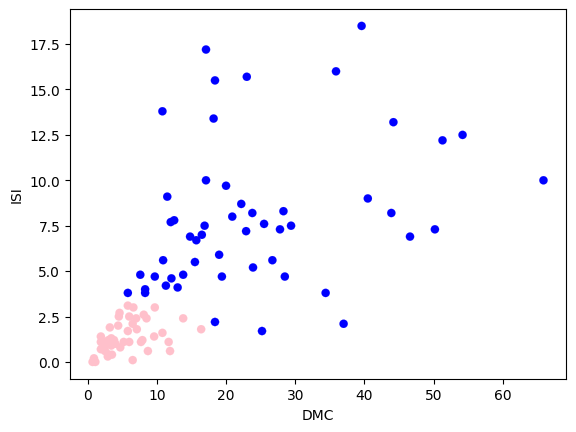

In [10]:
plt.figure(1)
c = ['blue' if e == 'fire' else 'pink' for e in y_pred]
plt.scatter(X_test[:,0], X_test[:,1], color=c, linewidths=0.1)
plt.xlabel('DMC')
plt.ylabel('ISI')

In [11]:
dat = {'y_Actual': y_test, 'y_Predicted': y_pred}
dff = pd.DataFrame(dat, columns=['y_Actual', 'y_Predicted'])
cross_table = pd.crosstab(dff['y_Actual'], dff['y_Predicted'],
                         rownames=['Actual'], colnames=['Predicted'], margins = True)
print(cross_table)

Predicted  fire  not fire  All
Actual                        
fire         49         2   51
not fire      3        44   47
All          52        46   98


3+2=5 из 98 => 94,9 % точность

In [12]:
n = np.array([[3.4, 1.3],
             [16.0, 4.5],
             [31.9, 6.8],
             [5.8,  3.8]])

[ 5.5  1.2 12.2  0.6 12.5  1.   5.6 15.7  1.6  1.2  3.8  9.1  0.4  1.9
  7.3  0.4  8.2  1.8  7.6  0.1  1.   4.8  0.   2.   4.   2.5  0.2  5.9
  1.1  2.1  3.8  1.1  1.7  2.4  8.2  2.1  1.1  0.8  2.5 13.4  1.8  0.9
  0.6  6.9  2.7  1.7  5.6  4.8  7.2  1.3  4.7  4.7  7.8  3.8  7.5 13.8
 17.2  2.2  0.   8.   0.6  7.5  5.2  9.7  4.6 15.5  2.6 18.5  4.2  4.1
  1.1 13.2  1.1  1.4  4.7  1.1  7.   0.8  7.3  0.4  3.   2.4  8.7 10.
 10.   1.2  9.   1.4  2.4  6.9  6.7  0.3  3.   0.7  3.1  8.3 16.   7.7]


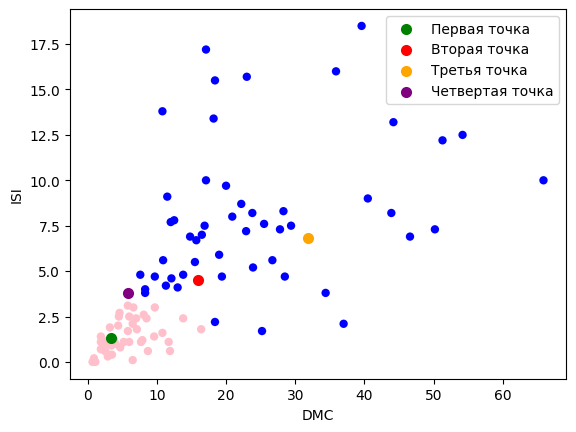

In [17]:
plt.figure(2)
plt.scatter(X_test[:,0], X_test[0:,1], color=c, linewidth=0.01)
plt.scatter(n[0,0], n[0,1], color='green', label='Первая точка', linewidth=2)
plt.scatter(n[1,0], n[1,1], color='red', label='Вторая точка', linewidth=2)
plt.scatter(n[2,0], n[2,1], color='orange', label='Третья точка', linewidth=2)
plt.scatter(n[3,0], n[3,1], color='purple', label='Четвертая точка', linewidth=2)
plt.xlabel('DMC')
plt.ylabel('ISI')
plt.legend()
plt.show()

In [14]:
new_points = gnb.fit(X_train, y_train).predict(n)
print(new_points)

['not fire' 'fire' 'fire' 'fire']
